In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test,y_test) = mnist.load_data()

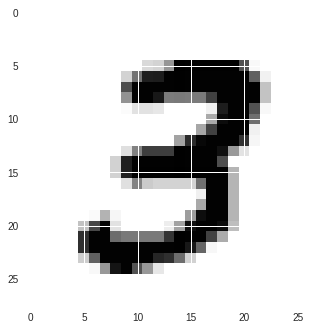

In [10]:
plt.imshow(x_train[7], cmap=plt.cm.binary)
plt.show()

In [19]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 126us/step - loss: 0.2623 - acc: 0.9238
Epoch 2/5
60000/60000 [==============================] - 7s 119us/step - loss: 0.1064 - acc: 0.9675
Epoch 3/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.0723 - acc: 0.9774
Epoch 4/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.0549 - acc: 0.9826
Epoch 5/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.0415 - acc: 0.9865


In [20]:
val_loss, val_accuracy = model.evaluate(x_test, y_test)

print("val_loss: ", val_loss)
print("val_accuracy: ", val_accuracy)

10000/10000 [==============================] - 0s 33us/step
val_loss:  0.08775688839368523
val_accuracy:  0.9758


In [34]:
pred = model.predict([x_test])
pred

array([[5.53407060e-12, 4.48656046e-09, 2.69270650e-08, ...,
        9.99999881e-01, 1.71438683e-10, 4.32051372e-09],
       [3.70449439e-13, 5.13047416e-05, 9.99948621e-01, ...,
        6.39494402e-10, 1.12856435e-09, 1.99570301e-15],
       [7.93106825e-09, 9.99976277e-01, 3.52069492e-06, ...,
        1.27575886e-05, 5.63209323e-06, 1.74269399e-08],
       ...,
       [1.00940055e-10, 1.61435651e-06, 5.53363888e-09, ...,
        1.54106442e-06, 2.17833389e-07, 9.58906732e-09],
       [9.59823936e-08, 4.68295713e-09, 1.55411195e-09, ...,
        1.39838203e-08, 1.72046770e-04, 6.80231294e-09],
       [1.27939241e-08, 1.86674853e-09, 6.05341199e-09, ...,
        2.65598689e-11, 6.51372822e-09, 2.33996128e-10]], dtype=float32)

In [39]:
import numpy as np

print(np.argmax(pred[20]))

9


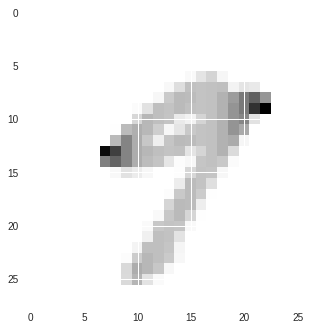

In [40]:
plt.imshow(x_test[20])
plt.show()

In [0]:
#from tensorflow.python.keras.models import save_model

#model.save('Deploy_model.model')

#new_model = tf.keras.models.load_model('Deploy_model.model')
